# Week 4 Lecture - Classification Algorithms (Part 3) {-}


### Unit Convenor & Lecturer {-}
[George Milunovich](https://www.georgemilunovich.com)  
[george.milunovich@mq.edu.au](mailto:george.milunovich@mq.edu.au)

### References {-}

1. Python Machine Learning 3rd Edition by Raschka & Mirjalili - Chapter 3 (second half)
2. Various open-source material

### Week 4 Learning Objectives {-}

- **Support Vector Machines (SVMs)**
    - Maximum Margin Classification
    - Dealing With a Nonlinearly Separable Case Using Slack Variables
    - Solving Nonlinear Problems Using Kernel SVM
    - Kernel Trick
    - Implementations in `scikit-learn` 
- **Decision Tree Learning**
    - Maximizing Information Gain
    - Building a Decision Tree
- **Random Forests**
    - Combining Multiple Decision Trees  
- **K-nearest Neighbors (KNN)**

---

## Support Vector Machines (SVMs) - Maximum Margin Classification {-}

Support Vector Machine can be seen as an extension of the perceptron algorithm
- SVMs were initially developed to deal with the problem of overfitting
- They can also efficiently handle cases where the relationship between classes in not linear via kernels





<img src="images/image1.jpg" alt="Drawing" style="width: 500px;"/>

<!-- ![](images/image1.jpg) -->

<br> 
<br>

Some key concepts related to SVMs:
- **Decision Boundary** (separating line/hyperplane): The line that SVM tries to find which best separates the two classes of the data
- **Support Vectors**: observations which are closest to the decision boundary
    - Decision boundary is equal distance between the support vectors of the two classes 
- **Positive and Negative Hyperplanes**: This are the lines/hyperplane that go through support vectors and lie on each side of the decision boundary, and are parallel to it. 
- **The Margin**
    - The margin is related to the distance between the **decision boundary** and the training examples that are closest to this boundary
    - Technically the **margin** is defined as the normalised distance between the positive and negative hyperplanes (see the equations below)



SVM attempts to **maximize the margin**
- Obtain **maximal separation** between the closest elements of two classes  
- The reason for preferring decision boundaries with large margins is that models with large margins are **less likely to be overfitted**
    - Large margins lead to better performance on test data (lower generalisation error)
- SVM is still a linear model (fits a linear decision boundary) however
    - The objective of SVM (maximize the margin) is different from the objective of the perceptron algorithm which attempts to minimise misclassification errors
    - This results in different weights and hence produced a different decision boundary 

<hr style="width:25%;margin-left:0;"> 


### How SVMs find the maximum margin {-}

First consider the case where we have two features $x_1$ and $x_2$ and remember the equation of the straight line which we can use to plot the decision boundary 

$w_1x_1 + w_2x_2 + w_0 = 0 \Rightarrow x_2 = -\frac{w_0}{w_2}-\frac{w_1}{w_2}x_1=b+mx_1$

Now consider the following two lines where the first line is on the positive (+) class side of the boundary and the second is on the negative (-) class side: 

$w_1x_1^+ + w_2x_2^+ + w_0 = 1 \Rightarrow x_2^+ = \left(\frac{1}{w_2}-\frac{w_0}{w_2}\right)-\frac{w_1}{w_2}x_1^+$    
$w_1x_1^- + w_2x_2^- + w_0 = -1 \Rightarrow x_2^- = \left(-\frac{1}{w_2}-\frac{w_0}{w_2}\right)-\frac{w_1}{w_2}x_1^-$

As you can see only the intercepts have changed.  

- The first equation is above the original line while the second equation is below the original line.
- By choosing $w_0, w_1$ and $w_2$ we can change the intercept and slope of the decision boundary, as well as how far from it are the lines above and below (positive and negative hyperplanes). 

How does SVM select best $w_0, w_1$ and $w_2$?

To find the distance between the two hyperplanes we **subtract** the last equation from the one above it:  

$w_1(x_1^+ - x_1^-) + w_2(x_2^+ - x_2^-) = 2$

Normalisation: Next we divide the above equation by the length of the $\mathbf{w}=\left[\begin{array}{c} 
w_1\\
w_2\\
\end{array}\right]$ which is defined as $||w||=\sqrt{(w_1^2 + w_2^2)}$ to obtain the **distance** between the two hyperplanes which is the **margin**:

$\frac{w_1(x_1^+ - x_1^-) + w_2(x_2^+ - x_2^-)}{\sqrt{(w_1^2 + w_2^2)}} = \frac{2}{\sqrt{(w_1^2 + w_2^2)}}=\frac{2}{||w||}$



<span style='background:red'> In order to maximize the margin SVM will minimize its "inverse":

- Choose $w_0, w_1, w_2$ to minimize $\frac{1}{2}||w||^2$ subject to two **constraints**

1. $w_0 + w_1x_1^{(i)}+w_2x_2^{(i)}\ge 1$ if $y^{(i)}=1$ i.e. all positive-class examples fall above the positive hyperplane
2. $w_0 + w_1x_1^{(i)}+w_2x_2^{(i)}\le -1$ if $y^{(i)}=-1$ i.e. all negative-class examples fall below the negative hyperplane

</span>

This type of **constrained optimization** can be done using quadratic programming. We will not get into mathematical details here.

<hr style="width:25%;margin-left:0;"> 

### Dealing with a nonlinearly separable case using slack variables {-}

When dealing with nonlinearly separable data the above constraints will not be satisfied in the presence of misclassification   

- SVM **will not be able to maximize the margin**
- Introduce **slack variables** $\xi>0$  -> this is called **soft-margin clasification**
- Slack variables will allow the algorithm to converge (find optimal $w$'s) even when dealing with nonlinearly separable data and have classification errors
    - Slack variables are introduced to allow certain constraints to be violated. 
    - That is, certain training points will be allowed to be within the margin. 
    - It is desirable that the number of points within the margin is as small as possible

<span style='background:red'> SVM will now solve do following problem:

- Minimize $\frac{1}{2}||w||^2 + C\left(\sum_i\xi^{(i)}\right)$ subject to the following constraints   
    
1. $w_0 + w_1x_1^{(i)}+w_2x_2^{(i)}\ge 1-\xi^{(i)}$ if $y^{(i)}=1$
2. $w_0 + w_1x_1^{(i)}+w_2x_2^{(i)}\le -1+\xi^{(i)}$ if $y^{(i)}=-1$  

<br>
    
Here parameter $C$ deals with how we treat misclassification and control the width of the margin   
    
- Large $C$ -> Large error penalties for making misclassification errors
    - Decrease Bias (less misclassified examples -> narrower margin)
    - Increase Variance (possible overfitting)
- Small $C$ -> Small error penalties (less costly to make misclassification errors)
    - Increase Bias (more misclassified examples -> wider margin)
    - Decrease Variance (less overfitting)
    

<img src="images/image2.jpg" alt="Drawing" style="width: 450px;"/>
    
<!-- ![](images/image2.jpg) -->


<hr style="width:25%;margin-left:0;"> 

## `scikit-learn` SVM implementation {-}


```
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)    # set random seed to be able to generate SAME random data every time

X_xor = np.random.randn(200, 2)    # create observations from a random normal (0,1) variable

y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)     # create a linearly non-sparable target
print(np.hstack((X_xor[:10], y_xor[:10].reshape(-1,1))))

y_xor = np.where(y_xor, 1, -1)
print(np.hstack((X_xor[:10], y_xor[:10].reshape(-1,1))))


plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1') # columns 0 and 1
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.xlabel(r'$\mathbf{x_1}$', fontweight='bold')
plt.ylabel(r'$\mathbf{x_2}$', fontweight='bold')
plt.tight_layout()
plt.show()
```

[[ 1.62434536 -0.61175641  1.        ]
 [-0.52817175 -1.07296862  0.        ]
 [ 0.86540763 -2.3015387   1.        ]
 [ 1.74481176 -0.7612069   1.        ]
 [ 0.3190391  -0.24937038  1.        ]
 [ 1.46210794 -2.06014071  1.        ]
 [-0.3224172  -0.38405435  0.        ]
 [ 1.13376944 -1.09989127  1.        ]
 [-0.17242821 -0.87785842  0.        ]
 [ 0.04221375  0.58281521  0.        ]]
[[ 1.62434536 -0.61175641  1.        ]
 [-0.52817175 -1.07296862 -1.        ]
 [ 0.86540763 -2.3015387   1.        ]
 [ 1.74481176 -0.7612069   1.        ]
 [ 0.3190391  -0.24937038  1.        ]
 [ 1.46210794 -2.06014071  1.        ]
 [-0.3224172  -0.38405435 -1.        ]
 [ 1.13376944 -1.09989127  1.        ]
 [-0.17242821 -0.87785842 -1.        ]
 [ 0.04221375  0.58281521 -1.        ]]


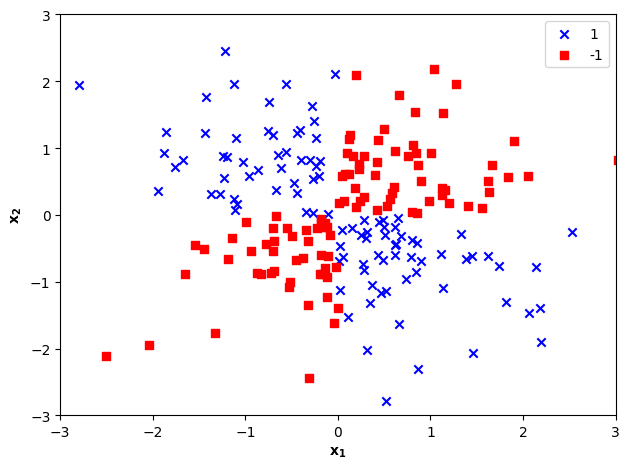

In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)    # set random seed to be able to generate SAME random data every time

X_xor = np.random.randn(200, 2)    # create observations from a random normal (0,1) variable

y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)     # create a linearly non-sparable target
print(np.hstack((X_xor[:10], y_xor[:10].reshape(-1,1))))

y_xor = np.where(y_xor, 1, -1)
print(np.hstack((X_xor[:10], y_xor[:10].reshape(-1,1))))


plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1') # columns 0 and 1
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.xlabel(r'$\mathbf{x_1}$', fontweight='bold')
plt.ylabel(r'$\mathbf{x_2}$', fontweight='bold')
plt.tight_layout()
plt.show()

<hr style="width:25%;margin-left:0;"> 

To employ SVM we will use `scikit-learn` implementation 
   
- [https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

- Lets also put our `plot_decision_regions` function from Week 3 into `plot_decision_regions.py` file

<hr style="width:25%;margin-left:0;"> 

```

from sklearn.svm import SVC
import plot_decision_regions as pdr


svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_xor, y_xor)

pdr.plot_decision_regions(X_xor, y_xor, classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
print(f'Accuracy = {svm.score(X_xor, y_xor):.3f}')
```

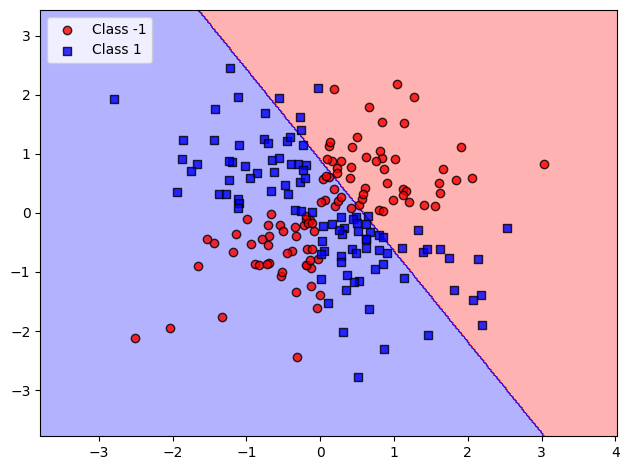

Accuracy = 0.630


In [2]:
from sklearn.svm import SVC
import plot_decision_regions as pdr


svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_xor, y_xor)

pdr.plot_decision_regions(X_xor, y_xor, classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
print(f'Accuracy = {svm.score(X_xor, y_xor):.3f}')

<hr style="width:25%;margin-left:0;"> 

## Linearly Inseparable Data and Kernel Methods {-}

- As discussed before linearly inseparable data is data which is not perfectly separable using a line, a plane or a hyperplane

<img src="images/pic3.png" alt="Drawing" style="width: 550px;"/>

<!-- ![](images/pic3.png) -->

The above figure illustrates linearly inseparable data   

- None of the classification algorithms we have covered so far would be able to classify linearly inseparable data accurately

**Kernel Methods**   

- Deal with linearly inseparable data
- Employ a nonlinear function $\phi$
- Create a nonlinear function of the orginal features using $\phi$ creating another dimension in the feature space
- Data becomes linearly separable in the higher dimensional space
- This allows us to separate the two classes via a linear hyperplane that becomes a nonlinear decision boundary when we project is back to the original feature space


Consider the following case


<img src="images/image3.jpg" alt="Drawing" style="width: 450px;"/>

<!-- ![](images/image3.jpg) -->

Here we have the following:   

- Orginal features are $x_1$ and $x_2$ 
- We can transform the original two-dimensional feature space into a three-dimensional feature space  
- This can be done as follows $\phi(x_1, x_2)=(z_1, z_2, z_3)=(x_1, x_2, x_1^2 + x_2^2)$
- the transformation we used here employs a polynomial kernel, but there are many other functions which are used
- a visualisation of this example is here [https://youtu.be/OdlNM96sHio](https://youtu.be/OdlNM96sHio)


---
---

### The Kernel Trick {-}

The method we used above can be described as follows   

- Transform the original data using a nonlinear function $\phi$
- This creates a higher dimensional feature space (we add one extra dimension using the values of $\phi$)
- Train a linear SVM to clasify the data in the new feature space
- When we wish to classify **test data** transform it using $\phi$ as well
- Apply trained SVM to the transformed test data

The approach described above is complicated and can be computationally expensive   
- In the previous examples we added only one extra dimension since $\phi$ was relatively simple and we had only 2 features   
- If we had 3 features to start with $(x_1, x_2, x_3)$ we would add 3 new dimensions $(𝑥^2_1+𝑥^2_2)$, $(𝑥^2_1+𝑥^2_3)$, $(𝑥^2_2+𝑥^2_3)$   
- Consider if we have hundreds of features and a more complicated $\phi$
- We want to avoid creating all the new features if possible
- Interestingly this is possible
    - Most machine learning methods use features by computing their dot products
    - E.g. $x_1^Tx_2=x_{11}x_{21}+x_{12}x_{22}+\dots+x_{1m}x_{2m}$ 
    
<hr style="width:25%;margin-left:0;"> 
<hr style="width:25%;margin-left:0;"> 

**Kernel Trick** - define a kernel function and compute dot products directly
- Instead of
1. Choosing $\phi$
2. Creating new features $\phi(x_1)$ and $\phi(x_2)$
3. Computing dot product $\phi(x_i)^T\phi(x_j)$ of new features
- We define a **kernel function** $\kappa\left(x_i, x_j\right)=\phi(x_i)^T\phi(x_j)$ and avoid having to create new features $\phi(x_1), \phi(x_2),\dots$
    - We compute a nonlinear function $\kappa$ of the dot products of original features, instead of dot products of new nonlinear functions $(\phi)$
    - This changes the order of operations done on the data
    - Why do this?
    - It is easier to take a nonlinear function of a sum (one number) rather than do sums of nonlinear functions 

<hr style="width:25%;margin-left:0;"> 
<hr style="width:25%;margin-left:0;"> 

There are a number of kernel functions that we use in practice. For instance we have

**Radial basis function (RBF) kernel** also known as the **Gaussian kernel**

$\kappa\left(x_i, x_j\right)=\text{exp}\left(-\frac{||x_i-x_j||^2}{2\sigma^2}\right)=\text{exp}\left(-\gamma||x_i-x_j||^2\right)$

where $\gamma=\frac{1}{2\sigma^2}$ is a hyperparameter
- <span style='background:red'> increasing $\gamma$ will lead to a tighter and less smooth decision boundary
    
- Besides the RBF kernel there are many other kernel functions, some of which are implemented in scikit-learn
    - [https://scikit-learn.org/stable/modules/metrics.html](https://scikit-learn.org/stable/modules/metrics.html)

---

### Implementing a Nonlinear Kernel with SVM

- In our previous application of SVM above we used a `linear` kernel   
    - Next we will use `rbf` kernel 
- Consider two values for $\gamma$ between 0.10 and 100  
    - [https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
- Later in the course we will learn how to find optimal values for hyperparameters such as $\gamma$, kernel and $C$   



```
svm2 = SVC(kernel='rbf', gamma = 0.10, C=10.0, random_state=1)
svm2.fit(X_xor, y_xor)

pdr.plot_decision_regions(X_xor, y_xor, classifier=svm2)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
print(f'Accuracy = {svm2.score(X_xor, y_xor):.3f}')
```

```# ----------------------------------------```

```
svm3 = SVC(kernel='rbf', gamma = 100, C=10.0, random_state=1)
svm3.fit(X_xor, y_xor)

pdr.plot_decision_regions(X_xor, y_xor, classifier=svm3)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
print(f'Accuracy = {svm3.score(X_xor, y_xor):.3f}')
```

---
---

# Decision Tree Learning {-}   

- Decision trees can build complex decision boundaries by dividing the feature space into rectangles   
- Decision tree model learns a series of questions regarding the features in the training set to infer the class labels of the examples   
    - Here we have to be careful
     - **The deeper a decision tree is, the more complex the decision boundary becomes, which can easily result in overfitting**
- High interpretability of results   
- Consider deciding what to do on a particular day with the following 4 class labels `{stay in, go to beach, go running, go to movies}`   


<img src="images/image5.jpg" alt="Drawing" style="width: 450px;"/>

<!-- ![](images/image5.jpg) -->

### How to build a decision tree {-}   

1. Start at the tree root and split the data on the feature which results in the largest **information gain - IG**
2. Repeat the splitting procedure at each child node until all training examples at each node belong to the same class (leaves are **pure**)   
    - This can result in very deep trees with many nodes which are overfitted   
    - To avoid overfitting we set the maximal depth for the tree (we **prune** the tree)   

<hr style="width:25%;margin-left:0;"> 

### Maximizing Information Gain (IG) {-}


While each node can be split in many child nodes, most libraries (including scikit-learn) implements **binary decision trees** (each node has two child nodes).

We split the nodes at most informative features by optimizing an objective function

$IG(D_p, f)=I(D_p)-\frac{N_\text{left}}{N_\text{p}}I(D_\text{left}) - \frac{N_\text{right}}{N_\text{p}}I(D_\text{right})$

- $I$ - Impurity measure
- $f$ - feature to perform the split, e.g. age or education level
- $D_p$ - dataset of the parent node
- $N_p$ - number of training examples at the parent node
- $D_j$ - dataset of the jth child node
- $N_j$ - number of training examples in the jth child node


Information Gain (IG) is the difference between the impurity of the parent node and the sum of the child node impurities

- **The node impurity is a measure of the homogeneity (sameness) of the labels at the node**
- The lower the impurities of the child nodes the larger the information gain


We will consider three measures of impurity $(I)$
1. Classification Error
2. Entropy 
3. Gini Impurity

---


### Impurity Measures

- Let $p(i)$ be the proportion of the examples that belong to class $i$ for a given node
    - For example we could have $p(i=1)=0.4$ and $p(i=0)=0.6$
- Binary classification (number of classes $c=2$)

<hr style="width:25%;margin-left:0;"> 


1. **Classification Error** ($I_E$)
- $I_E = 1- \text{max}[p(i)]$
    - Maximal if classes are perfectly mixed $P(i=1)=P(i=0)=0.5$
    - e.g. 1. $p(i=1)=1 \Rightarrow p(i=0)=0 \Rightarrow I_E=1 - \text{max}[p(i)] = 1 -1= 0$  
    - e.g. 2. $p(i=1)=0.5 \Rightarrow p(i=0)=0.5 \Rightarrow I_E=1 -0.5 = 0.5$


2. **Entropy** 
- $I_H=-[p(i=0)\text{log}_2p(i=0) + p(i=1)\text{log}_2p(i=1)]$
    - Maximal if classes are perfectly mixed
    - e.g. 1. if $p(i=1)=1 \Rightarrow p(i=0)=0 \Rightarrow I_H=-[0(-\infty) + 1(0)]=0$  
    - e.g. 2. if $p(i=1)=0.5 \Rightarrow p(i=0)=0.5$ $\Rightarrow I_H=-[0.5\text{log}_2(0.5) + 0.5\text{log}_2(0.5)]=1$

3. **Gini Impurity** 
- $I_G=[p(i=0)(1-p(i=0)+p(i=1)(1-p(i=1)]$
    - Maximal if classes are perfectly mixed
    - e.g. 1. if $p(i=1)=1 \Rightarrow p(i=0)=0 \Rightarrow I_G=[0(1) + 1(0)]=0$  
    - e.g. 2. if $p(i=1)=0.5 \Rightarrow p(i=0|t)=0.5 \Rightarrow I_G=[0.5(0.5) + 0.5(0.5)]=0.5$



<img src="images/image10.jpg" alt="Drawing" style="width: 450px;"/>

<!-- ![](images/image10.jpg) -->

<hr style="width:25%;margin-left:0;"> 

### Building a decision tree with `scikit-learn`  {-}

- `scikit-learn` provides [https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)   
- As we can see there are a number of parameters to set such as `criterion` and `max_depth`   

Lets apply a decision tree to our linearly inseparable data generated above
- set `max_depth = 4` & `criterion='gini'`   

```
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', max_depth = 4, random_state=1)
tree_model.fit(X_xor, y_xor)



pdr.plot_decision_regions(X_xor, y_xor, classifier=tree_model)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
print(f'Accuracy = {tree_model.score(X_xor, y_xor):.3f}')
```


Lets visualize the decision tree model

```
from sklearn import tree

plt.style.use("seaborn-v0_8")
tree.plot_tree(tree_model)
plt.savefig('tree1.png')

plt.show()
```


<hr style="width:25%;margin-left:0;"> 

Alternatively we can use `Graphviz` program to produce a nicer image

We will need to install three new packages using the following commands

from Anaconda Prompt (search from start button)

`conda install pydotplus`  
`conda install graphviz`  
`conda install pyparsing`  

Restart Anaconda Navigator (do not just close browser window).  
We should now be able to use `graphviz` to plot our fitted tree model

```
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image  

dot_data = export_graphviz(tree_model, filled=True, rounded=True, class_names=['-1', '+1'], feature_names=['x1', 'x2'], out_file=None)
graph = graph_from_dot_data(dot_data.replace("\n", ""))
# graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')


Image(graph.create_png())
```

In [12]:
# !pip install graphviz

In [13]:
# !pip install pyparsing

---
## Random Forests {-}  

**Random Forests** are **ensembles** (collections) of decision trees   

- They average multiple decision trees which may individually suffer from high variance (overfitting)
- The process of averaging can reduce the amount of overfitting and result in a model which generalizes better to unseen data
- More difficult to interpret



**Random Forest Algorithm**   

1. Draw a random **bootstrap** sample of size $n$ from the training dataset (with replacement)
2. Grow a decision tree from the bootstrap sample:
    - Randomly select $d$ features without replacement (different from just training one tree)
    - Build a tree using these $d$ features
3. Repeat steps 1. and 2. $k$ times
4. Aggregate the prediction by each tree to assign the class label by **majority vote**
    - Every tree makes a prediction (votes) for each test example and the final output prediction is the one that receives more than half of the votes. 
    - If none of the predictions get more than half of the votes, we may say that the ensemble method could not make a stable prediction for this instance. 

**Hyperparameters**   

- number of trees ($k$) - typically the larger the $k$ the better the perfmance but more computationally expensive and can result in overfitting
- bootstrap size ($n$) - smaller $n$ -> increase randomness of random forest -> can reduce overfitting but also increase bias
    - `scikit-learn` sets $n=$sample size of training set (but with replacement)
- number of random features used, `scikit-learn` sets $d=\sqrt{m}$, where $m$ is the total number of features


`scikit-learn` implementation: [https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)


---

## Fitting Random Forest with `scikit-learn` {-}   


```
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)
forest.fit(X_xor, y_xor)


pdr.plot_decision_regions(X_xor, y_xor, classifier=forest)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
print(f'Accuracy = {forest.score(X_xor, y_xor):.3f}')
```

## K-nearest Neighbors (KNN) {-}  


KNN algorithm finds $k$ examples in the training set that are closest to the point we try to classify according to a distance metric chosen.

KNN is a **lazy learner** -> it does not learn a decision boundary using some function of data but instead memorizes the training dataset
    
**KNN Algorithm**   

1. Choose a number $k$ and a distance metric
2. Find the $k$-nearest neighbors of the data example we need to classify
3. Assign the class label by majority vote


Example: classifying a new datapoint (?) based on 5 nearest neighbors ($k$ = 5) from the training set


<img src="images/image11.jpg" alt="Drawing" style="width: 450px;"/>

<!-- ![](images/image11.jpg) -->

**Hyperparameters**   

- $k$ - crucial in finding a good balance between overfitting and underfitting
- Distance metric -> different metrics will find different neighbors


---

Lets find the distance betwen two vectors $x^T=[x_1 \quad x_2 \quad ... \quad x_n]$ and $z^T=[z_1 \quad z_2 \quad ... \quad z_n]$  

- Minkowski distance (metric) is equal to $d(x,z)=\sqrt[p]{|x_1 - z_1|^p+|x_2 - z_2|^p+\dots+|x_n - z_n|^p}$  
- When $p=2$ we have Euclidean distance $d(x,z)=||x-z||=\sqrt{(x_1 - z_1)^2+(x_2 - z_2)^2+\dots+(x_n - z_n)^2}$ 
    - Setting $z = 0$ (vector zero) will give us the norm (vector length) of $x$ from before


KNN advantage: immediately adapts as we collect new data  
KNN disadvantage: computationally complexity grows as we add more examples to our training set

`scikit-learn` [https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)


- Try varying `n_neighbors` over across the values {50, 20, 2}

```
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

knn.fit(X_xor, y_xor)


pdr.plot_decision_regions(X_xor, y_xor, classifier=knn)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
print(f'Accuracy = {knn.score(X_xor, y_xor):.3f}')
```